In [ ]:
# Filtro Passa-Baixas RC
# Alunos: Christophe Abelem, Hugo Monteiro, Edgar Klewert
# Professor: Erick Melo Rocha 

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# =========================
# Projeto Matemático
# =========================

# Parâmetros iniciais
R = 1000            # Resistência em ohms
C = 100e-9          # Capacitância em farads (100 nF)
fc = 1 / (2 * np.pi * R * C)

print("🔹Projeto Matemático")
print(f"Resistência R = {R} Ω")
print(f"Capacitância C = {C} F ({C*1e9:.1f} nF)")
print(f"Frequência de corte fc = {fc:.2f} Hz")
print("\nFunção de Transferência: H(f) = 1 / √(1 + (f/fc)²)")
print("Ganho em -3dB = 0.707 × Vin (na fc)")


🔹Projeto Matemático
Resistência R = 1000 Ω
Capacitância C = 1e-07 F (100.0 nF)
Frequência de corte fc = 1591.55 Hz

Função de Transferência: H(f) = 1 / √(1 + (f/fc)²)
Ganho em -3dB = 0.707 × Vin (na fc)


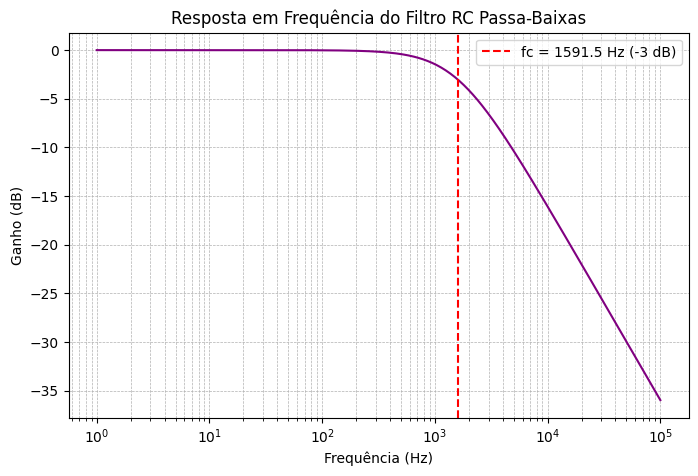

In [5]:
# =========================
# Resposta em Frequência
# =========================

def ganho_linear(f, fc):
    return 1 / np.sqrt(1 + (f/fc)**2)

frequencias = np.logspace(0, 5, 500)  # 1 Hz a 100 kHz
ganho = ganho_linear(frequencias, fc)
ganho_db = 20 * np.log10(ganho)

plt.figure(figsize=(8,5))
plt.semilogx(frequencias, ganho_db, color='purple')
plt.title('Resposta em Frequência do Filtro RC Passa-Baixas')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Ganho (dB)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axvline(fc, color='red', linestyle='--', label=f'fc = {fc:.1f} Hz (-3 dB)')
plt.legend()
plt.show()


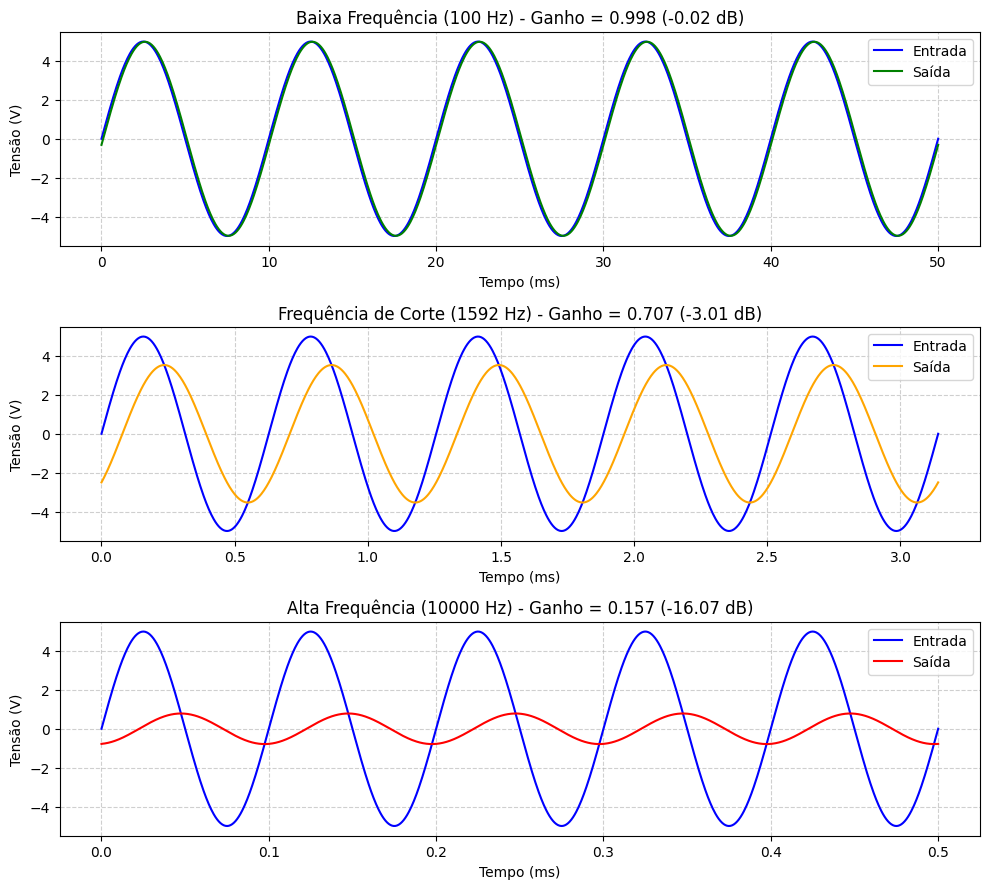

In [6]:
# =========================
# Simulação de Sinais
# =========================

def simular_sinal(f, fc, amplitude=5, pontos=1000, ciclos=5):
    periodo = 1 / f
    t = np.linspace(0, ciclos * periodo, pontos)
    ganho = ganho_linear(f, fc)
    fase = -np.arctan(f / fc)
    entrada = amplitude * np.sin(2 * np.pi * f * t)
    saida = amplitude * ganho * np.sin(2 * np.pi * f * t + fase)
    return t*1000, entrada, saida, ganho, fase

freqs = [100, fc, 10000]
cores = ['green', 'orange', 'red']
titulos = ['Baixa Frequência', 'Frequência de Corte', 'Alta Frequência']

plt.figure(figsize=(10,9))
for i, f in enumerate(freqs):
    t, entrada, saida, ganho, fase = simular_sinal(f, fc)
    plt.subplot(3,1,i+1)
    plt.plot(t, entrada, label='Entrada', color='blue')
    plt.plot(t, saida, label='Saída', color=cores[i])
    plt.title(f"{titulos[i]} ({f:.0f} Hz) - Ganho = {ganho:.3f} ({20*np.log10(ganho):.2f} dB)")
    plt.xlabel("Tempo (ms)")
    plt.ylabel("Tensão (V)")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()

plt.tight_layout()
plt.show()


In [8]:
# =========================
# Análise e Conclusões
# =========================

print("🔹Análise e Conclusões\n")

print("Comportamento Observado:")
print(" - Baixas frequências (f << fc): passam praticamente sem atenuação.")
print(" - Frequência de corte (f = fc): atenuação de -3 dB (0.707 da amplitude).")
print(" - Altas frequências (f >> fc): forte atenuação (~ -20 dB/década).")

print("\nValidação do Projeto:")
print(f" - A frequência de corte calculada foi {fc:.2f} Hz.")
print(" - O comportamento da resposta em frequência confirma um filtro RC de 1ª ordem.")

print("\nAplicações Práticas:")
print(" - Filtros de áudio, anti-aliasing para ADCs, condicionamento de sinais,")
print("   e redução de ruído em sistemas analógicos.")


🔹Análise e Conclusões

Comportamento Observado:
 - Baixas frequências (f << fc): passam praticamente sem atenuação.
 - Frequência de corte (f = fc): atenuação de -3 dB (0.707 da amplitude).
 - Altas frequências (f >> fc): forte atenuação (~ -20 dB/década).

Validação do Projeto:
 - A frequência de corte calculada foi 1591.55 Hz.
 - O comportamento da resposta em frequência confirma um filtro RC de 1ª ordem.

Aplicações Práticas:
 - Filtros de áudio, anti-aliasing para ADCs, condicionamento de sinais,
   e redução de ruído em sistemas analógicos.
